# Keras API Project Exercise

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle.

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), we build a model that can predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. 

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

# 1- Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# 2- Loading the data 

In [143]:
df = pd.read_csv('lending_club_loan_two.csv')

In [144]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16,0,36369,41.8,25,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17,0,20131,53.3,27,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13,0,11987,92.2,26,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6,0,5472,21.5,13,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13,0,24584,69.8,43,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [145]:
df.shape

(396030, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

In [6]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


# 3- Data Cleaning

**We will create a Series that displays the total count of missing values per column.**

In [7]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

**We will convert this Series to be in term of percentage of the total DataFrame.**

In [8]:
(df.isnull().sum())/(df.shape[0])*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

### **1- "emp_title"**
The job title supplied by the Borrower when applying for the loan.

In [9]:
df['emp_title'].nunique()

173105

In [10]:
df.drop(['emp_title'],axis=1,inplace=True)

**Realistically there are too many unique job titles to try to convert this to a dummy variable feature. So we remove that emp_title column.**

### **2- "emp_length"** 
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

In [11]:
df['emp_length'].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

**We create a count plot of the emp_length feature column. We sort the order of the values.**

In [12]:
df['emp_length'].sort_values().unique()

array(['1 year', '10+ years', '2 years', '3 years', '4 years', '5 years',
       '6 years', '7 years', '8 years', '9 years', '< 1 year', nan],
      dtype=object)

In [13]:
new_order=['< 1 year','1 year', '2 years', '3 years', '4 years', '5 years',
       '6 years', '7 years', '8 years', '9 years','10+ years']

Text(0.5, 1.0, 'Countplot of Employment Length')

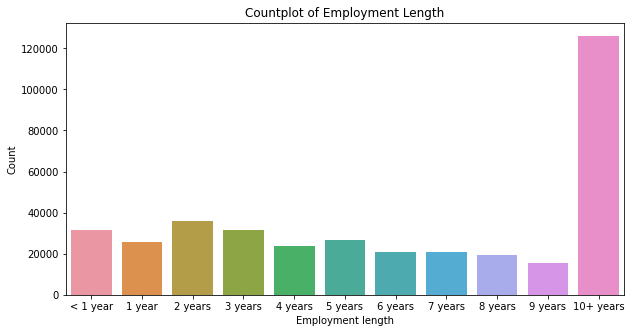

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(x='emp_length', data=df, order=new_order)
plt.xlabel('Employment length')
plt.ylabel('Count')
plt.title('Countplot of Employment Length')

**We plot out the countplot with a hue separating Fully Paid vs Charged Off**

Text(0.5, 1.0, 'Countplot of Employment Length vs. Loan Status')

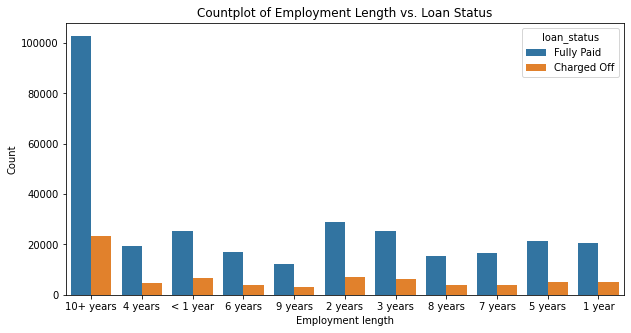

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(x='emp_length', data=df, hue='loan_status')
plt.xlabel('Employment length')
plt.ylabel('Count')
plt.title('Countplot of Employment Length vs. Loan Status')

**This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan.**

In [16]:
new=[]
for x in df['emp_length'].dropna().unique():
    df1=df[df['emp_length']==x]
    new.append(100*(df1[df1['loan_status']=='Charged Off']['loan_status'].count())/(df1['loan_status'].count()))
print(new)

[18.418609817440355, 19.238476953907817, 20.68715524034673, 18.919437646945923, 20.04701580253363, 19.32620649231027, 19.52313279646297, 19.976001669449083, 19.47740045151064, 19.218720513304397, 19.913453365273163]


Text(0.5, 1.0, 'Percentage of Charged off Loans vs. Employment Length')

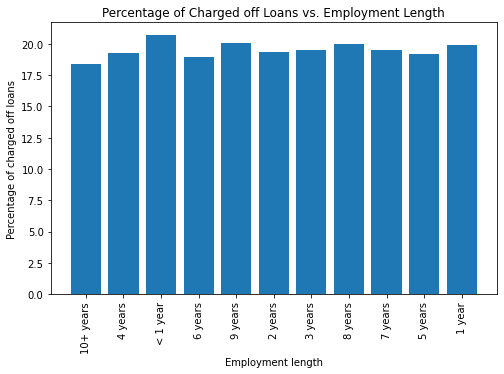

In [17]:
plt.figure(figsize=(8,5))
plt.bar(x=df['emp_length'].dropna().unique(),height=[18.418609817440355, 19.238476953907817, 20.68715524034673, 18.919437646945923, 20.04701580253363, 19.32620649231027, 19.52313279646297, 19.976001669449083, 19.47740045151064, 19.218720513304397, 19.913453365273163])
plt.xticks(rotation=90)
plt.xlabel('Employment length')
plt.ylabel('Percentage of charged off loans')
plt.title('Percentage of Charged off Loans vs. Employment Length')

**We can see the charge off rates are extremely similar across all employment lengths. So we drop the emp_length column.**

In [18]:
df.drop(['emp_length'],axis=1,inplace=True)

### **3- "title"**
The loan title provided by the borrower.

In [19]:
df['title'].nunique()

48817

**There are too many loan titles to try to convert this to a dummy variable feature. Also, the title column is simply a string subcategory/description of the purpose column. So we remove that emp_title column.**

In [ ]:
df.drop(['title'],axis=1,inplace=True)

### **4- mort_acc** 
Number of mortgage accounts.          

**We will fill the missing values of the mort_acc with  the mean of the other columns.**

In [21]:
df['mort_acc'].fillna(df['mort_acc'].mean(),inplace=True)

### **5- revol_util** 
Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

### **6- pub_rec_bankruptcies**
Number of public record bankruptcies.

**revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. So we remove the rows that are missing those values in those columns with dropna().**

In [22]:
df.dropna(inplace=True)

In [23]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

# 4- Feature Engineering

## 4-1- Time Formatting

### 1- ''earliest_cr_line''
earliest_cr_line	The month the borrower's earliest reported credit line was opened

**We extract the year from this feature and set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.**

In [24]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [25]:
df['earliest_cr_line']=pd.to_datetime(df['earliest_cr_line'])

In [26]:
df['earliest_cr_year']=df['earliest_cr_line'].apply(lambda x:x.year)

In [27]:
df.drop(['earliest_cr_line'],axis=1,inplace=True)

### 2- ''issue_d" 
The month which the loan was funded

**This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, and drop this feature.**

In [28]:
df.drop(['issue_d'],axis=1,inplace=True)

## 4-2- Encoding Categorical Variables 

### 1- "term"

The number of payments on the loan. Values are in months and can be either 36 or 60.

**We will convert the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().**

In [29]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [30]:
df['term']=df['term'].apply(lambda x: 36 if x==' 36 months' else 60)

### 2- "grade"

LC assigned loan grade

In [31]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

**We already know grade is part of sub_grade, so just drop the grade feature.**

In [32]:
df.drop(['grade'],axis=1,inplace=True)

### 3- "sub_grade"

LC assigned loan subgrade

**We convert the subgrade into numeric values.**

In [33]:
df['sub_grade'].nunique()

35

In [34]:
le1=LabelEncoder()

In [35]:
le1.fit(df['sub_grade'])

LabelEncoder()

In [36]:
df['encoded_sub_grade']=le1.transform(df['sub_grade'])

In [37]:
df['encoded_sub_grade'].unique()

array([ 8,  9,  7,  1, 14, 12,  0,  6, 10,  4, 23,  3,  2, 15, 11,  5, 17,
       19, 16, 20, 21, 24, 28, 22, 18, 30, 29, 31, 13, 25, 27, 34, 33, 26,
       32], dtype=int64)

**We will remove the "sub_grade" column after visualization and only keep "encoded_sub_grade" column.**

### 4- "home_ownership"

The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER

In [38]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'ANY', 'NONE'], dtype=object)

**First, we replace NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER.**

**Second, we convert the home_ownership into numeric values.**

In [39]:
df['home_ownership']=df['home_ownership'].apply(lambda x: 'OTHER' if x=='ANY' else 'OTHER' if x=='NONE' else x)

In [40]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER'], dtype=object)

In [41]:
le2=LabelEncoder()

In [42]:
le2.fit(df['home_ownership'])

LabelEncoder()

In [43]:
df['home_ownership']=le2.transform(df['home_ownership'])

In [44]:
df['home_ownership'].unique()

array([3, 0, 2, 1], dtype=int64)

### 5- "verification_status"

Indicates if income was verified by LC, not verified, or if the income source was verified

In [45]:
df['verification_status'].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [46]:
le3=LabelEncoder()

In [47]:
le3.fit(df['verification_status'])

LabelEncoder()

In [48]:
df['verification_status']=le3.transform(df['verification_status'])

In [49]:
df['verification_status'].unique()

array([0, 1, 2], dtype=int64)

### 6- "purpose"

A category provided by the borrower for the loan request.

In [50]:
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [51]:
le4=LabelEncoder()

In [52]:
le4.fit(df['purpose'])

LabelEncoder()

In [53]:
df['purpose']=le4.transform(df['purpose'])

In [54]:
df['purpose'].unique()

array([12,  2,  1,  4, 11,  6,  9,  7, 13,  0,  8,  5,  3, 10],
      dtype=int64)

### 7- "application_type"

Indicates whether the loan is an individual application or a joint application with two co-borrowers

In [55]:
df['application_type'].unique()

array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object)

In [56]:
le5=LabelEncoder()

In [57]:
le5.fit(df['application_type'])

LabelEncoder()

In [58]:
df['application_type']=le5.transform(df['application_type'])

In [59]:
df['application_type'].unique()

array([1, 2, 0], dtype=int64)

### 8- "initial_list_status"

The initial listing status of the loan. Possible values are – W, F

In [60]:
df['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

In [61]:
le6=LabelEncoder()

In [62]:
le6.fit(df['initial_list_status'])

LabelEncoder()

In [63]:
df['initial_list_status']=le6.transform(df['initial_list_status'])

In [64]:
df['initial_list_status'].unique()

array([1, 0], dtype=int64)

### 9- "address"

**First, we reate a column called 'zip_code' that extracts the zip code from the address column.**

**Second, we convert the zip_code into numeric values.**

**Third, we remove the address column.**

In [65]:
df['zip_code']=df['address'].apply(lambda x: x.split()[-1])

In [66]:
df['zip_code'].nunique()

10

In [67]:
df.drop(['address'],axis=1,inplace=True)

# 5- Exploratory Data Analysis

**Since we will be attempting to predict loan_status, we create a countplot as shown below.**

Text(0.5, 1.0, 'Countplot per Loan Status')

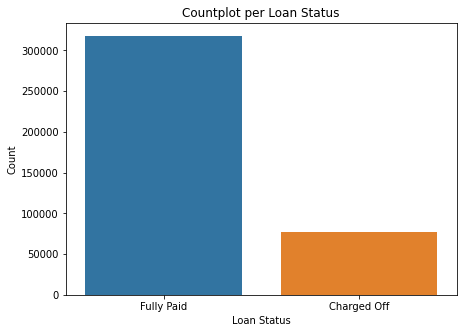

In [68]:
plt.figure(figsize=(7,5))
sns.countplot(x='loan_status', data=df)
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Countplot per Loan Status')

**We create a bar plot showing the correlation of the numeric features to loan_status, but first, we convert the "loan_status" column to numeric values and save them in a new column called "encoded_loan_status".**

In [69]:
le7=LabelEncoder()

In [70]:
le7.fit(df['loan_status'])

LabelEncoder()

In [71]:
df['encoded_loan_status']=le7.transform(df['loan_status'])

Text(0.5, 1.0, 'Correlation of Features with Loan Status')

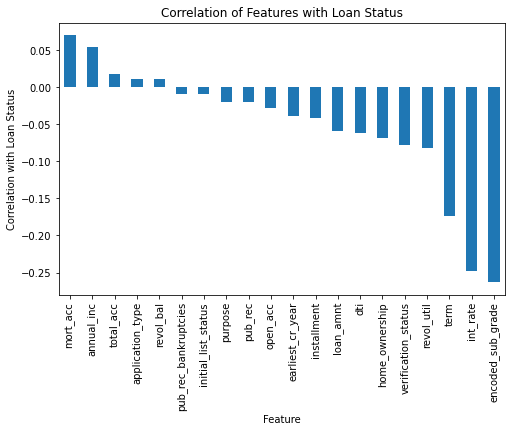

In [72]:
plt.figure(figsize=(8,5))
df.corr()['encoded_loan_status'].sort_values(ascending=False).drop('encoded_loan_status').plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Correlation with Loan Status')
plt.title('Correlation of Features with Loan Status')

**We explore correlation between all continuous numeric variables using .corr() method.**

In [73]:
df[['loan_amnt',  'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util','total_acc', 'mort_acc','pub_rec_bankruptcies']].corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168599,0.953872,0.337364,0.016338,0.198347,-0.078143,0.328515,0.099581,0.223695,0.212363,-0.106669
int_rate,0.168599,1.000000,0.162442,-0.057035,0.078758,0.011753,0.060857,-0.011290,0.293195,-0.036749,-0.079228,0.057588
installment,0.953872,0.162442,1.000000,0.330855,0.015511,0.188815,-0.068220,0.316664,0.123635,0.202255,0.185295,-0.098748
annual_inc,0.337364,-0.057035,0.330855,1.000000,-0.081730,0.136620,-0.013718,0.299758,0.027920,0.193395,0.224332,-0.050145
dti,0.016338,0.078758,0.015511,-0.081730,1.000000,0.135907,-0.017820,0.063461,0.088023,0.101772,-0.025181,-0.014600
open_acc,0.198347,0.011753,0.188815,0.136620,0.135907,1.000000,-0.018799,0.221053,-0.131821,0.680745,0.104855,-0.028042
pub_rec,-0.078143,0.060857,-0.068220,-0.013718,-0.017820,-0.018799,1.000000,-0.101883,-0.076257,0.019481,0.011437,0.699408
revol_bal,0.328515,-0.011290,0.316664,0.299758,0.063461,0.221053,-0.101883,1.000000,0.226305,0.191474,0.189673,-0.124694
revol_util,0.099581,0.293195,0.123635,0.027920,0.088023,-0.131821,-0.076257,0.226305,1.000000,-0.104694,0.007021,-0.086751
total_acc,0.223695,-0.036749,0.202255,0.193395,0.101772,0.680745,0.019481,0.191474,-0.104694,1.000000,0.363243,0.041957


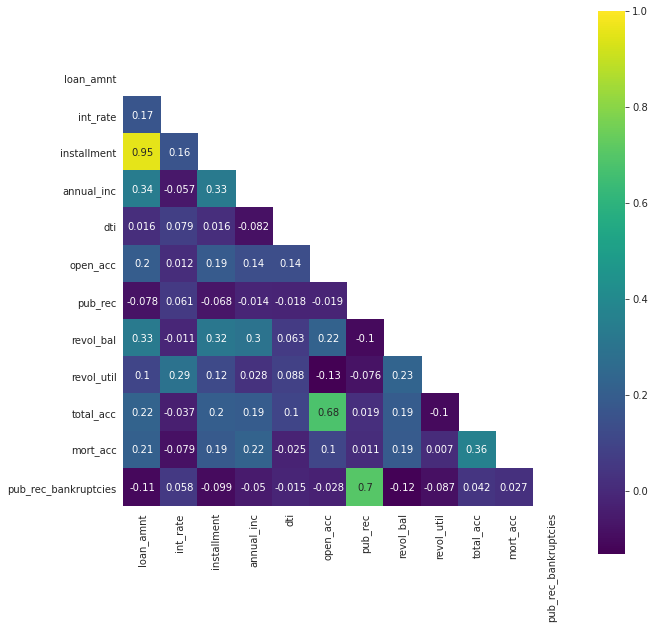

In [74]:
plt.figure(figsize=(10,10))

corr=df[['loan_amnt',  'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util','total_acc', 'mort_acc','pub_rec_bankruptcies']].corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True,annot=True, cmap='viridis')

**We create a histogram of the loan_amnt column.**

Text(0.5, 1.0, 'Distribution of Loan Amount')

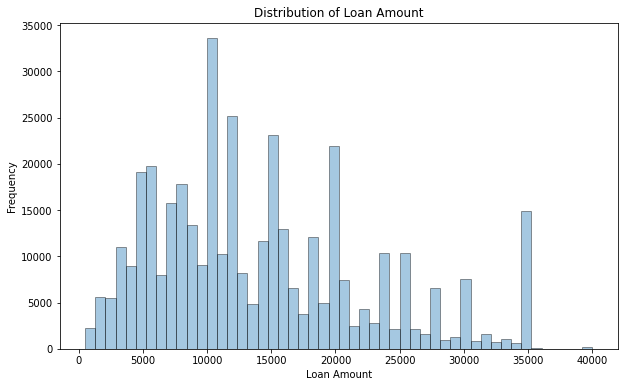

In [75]:
plt.figure(figsize=(10,6))
sns.distplot(df['loan_amnt'],bins=50, kde=False, hist_kws=dict(edgecolor='black'))
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amount')

**According to the heatmap, there is a perfect correlation between "loan_amnt" and the "installment" features. We explore this feature further, and print out their descriptions and perform a scatterplot between them.**

Text(0.5, 1.0, 'Installment vs. Loan Amount')

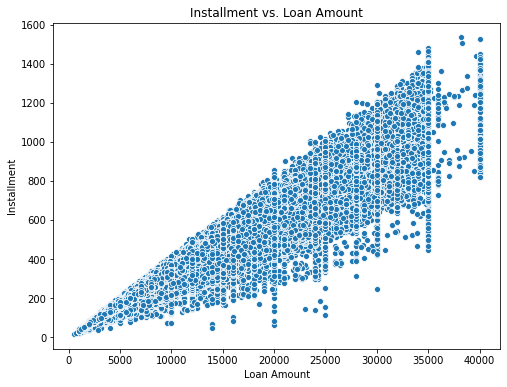

In [76]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='loan_amnt', y='installment', data=df)
plt.xlabel('Loan Amount')
plt.ylabel('Installment')
plt.title('Installment vs. Loan Amount')

**We can see that if the listed amount of the loan applied for by the borrower increases, the monthly payment owed by the borrower will increase.**

**We create a boxplot showing the relationship between the loan_status and the loan_amnt.**

Text(0.5, 1.0, 'Loan Amount vs. Loan Status')

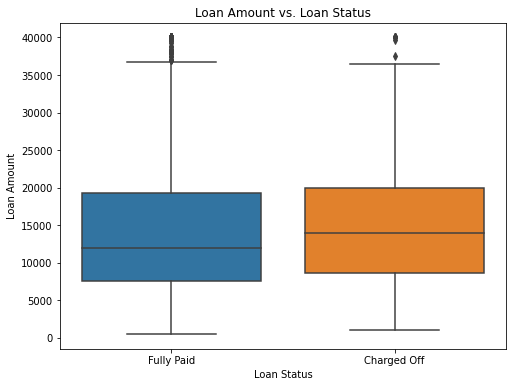

In [77]:
plt.figure(figsize=(8,6))
sns.boxplot(x='loan_status', y='loan_amnt', data=df)
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.title('Loan Amount vs. Loan Status')

**We calculate the summary statistics for the loan amount, grouped by the loan_status.**

In [78]:
df.groupby('loan_status').describe()['loan_amnt']

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77523.0,15132.578074,8503.989092,1000.0,8575.0,14000.0,20000.0,40000.0
Fully Paid,317696.0,13875.478681,8302.172723,500.0,7500.0,12000.0,19275.0,40000.0


**We explore the SubGrade column that LendingClub attributes to the loans. What are the unique possible grades and subgrades?**

**We create a count plot per subgrade**

Text(0.5, 1.0, 'Countplot per Subgrade')

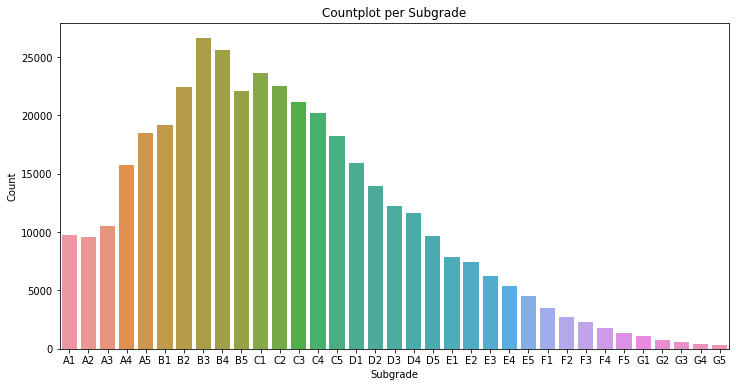

In [79]:
plt.figure(figsize=(12,6))
sns.countplot(x='sub_grade',data=df.sort_values(by='sub_grade'))
plt.xlabel('Subgrade')
plt.ylabel('Count')
plt.title('Countplot per Subgrade')

Text(0.5, 1.0, 'Countplot per Subgrade vs. Loan Status')

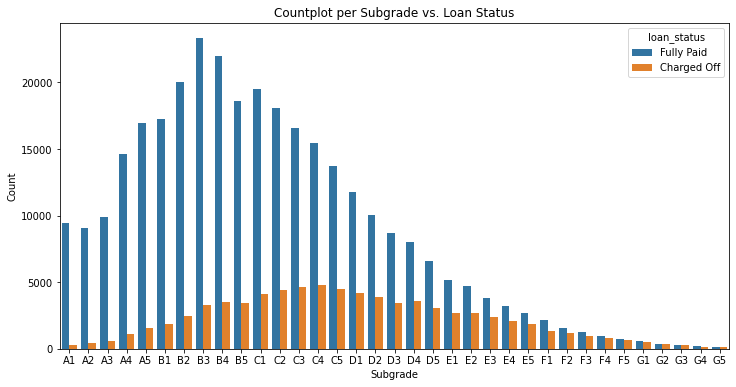

In [80]:
plt.figure(figsize=(12,6))
sns.countplot(x='sub_grade',data=df.sort_values(by='sub_grade'),hue='loan_status')
plt.xlabel('Subgrade')
plt.ylabel('Count')
plt.title('Countplot per Subgrade vs. Loan Status')

**As we already have the "encoded_sub_grade column", we drop the "sub_grade" column**

In [81]:
df.drop(['sub_grade'],axis=1,inplace=True)

**As we already have the "encoded_loan_status" column, we drop the "loan_status" column**

In [82]:
df.drop(['loan_status'],axis=1,inplace=True)

# 6- Data Splitting 

In [83]:
X=df.drop(['encoded_loan_status'],axis=1).values
y=df['encoded_loan_status'].values

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# 7- Scaling

In [85]:
mms=MinMaxScaler()

In [86]:
mms.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [87]:
X_train=mms.transform(X_train)

In [88]:
X_test=mms.transform(X_test)

# 8- Creating the Model

In [89]:
X_train.shape

(316175, 21)

In [127]:
model=Sequential()

model.add(Dense(21,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(21,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

## 9- Training the Model

In [91]:
es=EarlyStopping(monitor='val_loss', mode='min',patience=25,verbose=1)

In [128]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=600, batch_size=64, callbacks=[es])

Epoch 1/600
4941/4941 [==============================] - 10s 2ms/step - loss: 0.3971 - val_loss: 0.3549
Epoch 2/600
4941/4941 [==============================] - 9s 2ms/step - loss: 0.3445 - val_loss: 0.3262
Epoch 3/600
4941/4941 [==============================] - 9s 2ms/step - loss: 0.3368 - val_loss: 0.3166
Epoch 4/600
4941/4941 [==============================] - 10s 2ms/step - loss: 0.3321 - val_loss: 0.3112
Epoch 5/600
4941/4941 [==============================] - 10s 2ms/step - loss: 0.3259 - val_loss: 0.3062
Epoch 6/600
4941/4941 [==============================] - 10s 2ms/step - loss: 0.3101 - val_loss: 0.2887
Epoch 7/600
4941/4941 [==============================] - 10s 2ms/step - loss: 0.2957 - val_loss: 0.2835
Epoch 8/600
4941/4941 [==============================] - 10s 2ms/step - loss: 0.2920 - val_loss: 0.2819
Epoch 9/600
4941/4941 [==============================] - 10s 2ms/step - loss: 0.2901 - val_loss: 0.2815
Epoch 10/600
4941/4941 [==============================] - 10s 2ms/

Epoch 00156: early stopping


# 10- Evaluating Model Performance

### 10-1- Training Loss per Epoch

In [129]:
df_loss=pd.DataFrame(model.history.history)

In [130]:
df_loss.head()

,loss,val_loss
0,0.397116,0.354871
1,0.344499,0.326242
2,0.336821,0.316614
3,0.332066,0.311220
4,0.325900,0.306170


Text(0.5, 1.0, 'Training Loss per Epoch')

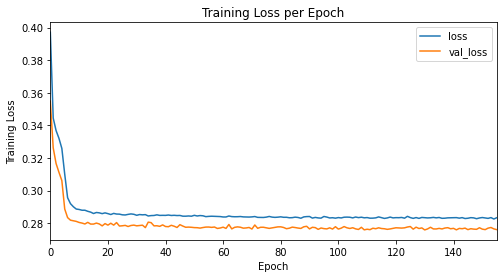

In [131]:
df_loss.plot(figsize=(8, 4))
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss per Epoch')

### 10-2- Further Evaluations

In [132]:
predictions=model.predict_classes(X_test)

In [133]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print('Accuracy Score: ',accuracy_score(y_test,predictions))

[[ 6764  8894]
 [   28 63358]]


              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



Accuracy Score:  0.8871261575831183


**The accuracy of our designed model is 89%.**

### 10-3- Predicting on a Random Customer

**Given the customer below, should we offer this person a loan?**

In [134]:
from random import randint

In [135]:
random_customer=randint(0,df.shape[0])

In [136]:
random_customer

345172

In [137]:
customer_data=df.drop(['encoded_loan_status'],axis=1).loc[random_customer]

In [138]:
X_train.shape

(316175, 21)

In [139]:
customer_data=customer_data.values.reshape(-1,21)

In [140]:
customer_data=mms.transform(customer_data)

In [141]:
model.predict_classes(customer_data)

array([[1]])

**We see that our model predicts that the randomly selected customer pays back his loan.**

**Now we check, did this person actually end up paying back their loan?**

In [142]:
df.loc[random_customer]['encoded_loan_status']

1

**And we see that our model prediction is accurate.**